Keshav Khari\
AE-1226\
B.SC(H) - Computer Science 5 Semester\
DATA MINING 2

# Q1

Apply clustering algorithm on the selected dataset. For each clusters compute : the mean and Ʃ the co-variance matrix. Use Mahalanobis Distance to compute distance of each point in the cluster from the mean. Report top 5% points as anomalies as given below: 

1)Use distance to compute anomaly score \
2)Distance-based anomaly score (on the basis of kth neighbour) \
3)Density-based anomaly score  \
4)Relative density-based anomaly score  \


Display points which are reported  outliers in atleast 3 of the above cases 

 

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import  NearestNeighbors



In [13]:
df = pd.read_csv('creditcard.csv')

In [14]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [15]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

## Pre-Processing

In [16]:
df_std = df.copy()

scaler = StandardScaler()

cols = df_std[['Time', 'Amount']]

results = scaler.fit_transform(cols)

df_std[['Time', 'Amount']] = results

In [17]:
df_std.drop(columns=['Class'], inplace=True)

## Performing Kmeans

### Using Elbow Method To find optimal Number of Clusters

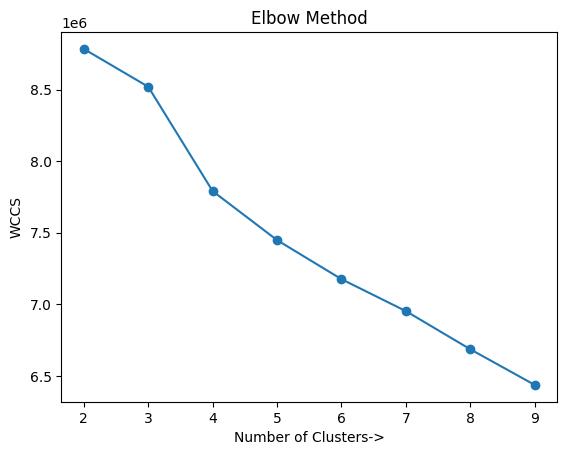

In [18]:
wccs = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_std)
    wccs.append(kmeans.inertia_)


# Plotting

plt.title("Elbow Method")
plt.plot(range(2,10), wccs, marker='o')
plt.xlabel("Number of Clusters->")
plt.ylabel("WCCS")
plt.show()

In [19]:
for i, wcc in enumerate(wccs):
    print(f"Number of Clusters {i + 2}: {wcc}")

Number of Clusters 2: 8784309.002061166
Number of Clusters 3: 8519922.004218228
Number of Clusters 4: 7790682.899473489
Number of Clusters 5: 7448284.223395181
Number of Clusters 6: 7175446.097122862
Number of Clusters 7: 6952196.97496253
Number of Clusters 8: 6685477.947830584
Number of Clusters 9: 6436519.386957921


4 Clusters are Optimal

In [20]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels = kmeans.fit_predict(df_std)
df_std['Labels'] = labels
centers = kmeans.cluster_centers_

In [11]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_std)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


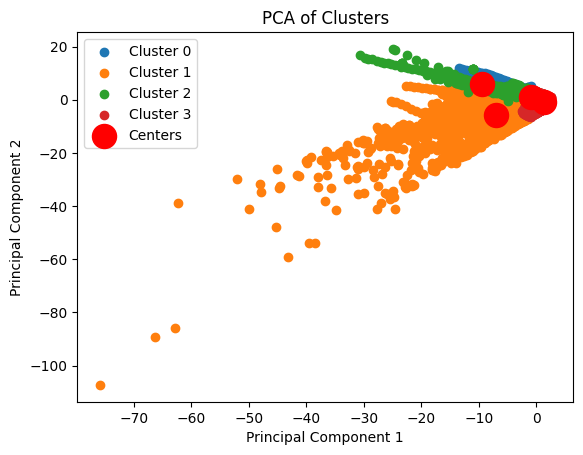

In [24]:
pca_df['Labels'] = labels

for i in range(4):  # Assuming 4 clusters
    plt.scatter(pca_df[pca_df['Labels'] == i]['PC1'], pca_df[pca_df['Labels'] == i]['PC2'], label=f'Cluster {i}')

# Plot the centers from the PCA transformed space
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='o', label='Centers')

plt.title('PCA of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

For each clusters compute : the mean and Ʃ the co-variance matrix

In [13]:
means = df_std.groupby('Labels').mean()

In [14]:
means

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Labels,,,,,,,,,,,,,,,,,,,,,
0,0.004723,-1.137549,0.662401,0.501302,-0.286866,0.289552,0.040172,0.255675,0.005901,-0.184448,...,0.030403,0.026900,0.065814,-0.013933,-0.000775,-0.117630,-0.009425,0.010182,0.005702,-0.118835
1,-0.025675,-5.342582,-6.068862,-1.693227,1.182131,-0.488362,0.072338,1.183953,-0.467492,0.108996,...,0.505082,0.107386,-0.166967,0.055137,0.019432,0.003587,0.001776,0.031172,-0.016978,3.871851
2,-0.843371,-10.551989,7.371094,-13.608220,6.711746,-8.107555,-2.357543,-12.050102,2.663164,-4.430282,...,0.772132,1.177108,-0.116671,0.008831,-0.048030,0.169379,0.006215,0.330692,0.113245,-0.039422
3,-0.002650,1.498083,-0.477829,-0.454403,0.252640,-0.283198,-0.043256,-0.311562,0.009206,0.205378,...,-0.056521,-0.036178,-0.064875,0.012906,0.000093,0.128755,0.010264,-0.013090,-0.005721,-0.036685


In [15]:
covariances = {}
for cluster in df_std['Labels'].unique():
    cluster_data = df_std[df_std['Labels'] == cluster].drop('Labels', axis=1)
    covariances[cluster] = cluster_data.cov()

In [16]:
cov_df = pd.concat(covariances, axis=0)
cov_df

Time        V1        V2        V3        V4        V5  \
0 Time    1.009928  0.113578  0.038533 -0.547985 -0.208625  0.249251   
  V1      0.113578  1.545751 -0.441025  0.609564  0.025233  0.459344   
  V2      0.038533 -0.441025  1.556724 -0.837479  0.313785 -0.321308   
  V3     -0.547985  0.609564 -0.837479  2.046852  0.330884 -0.193957   
  V4     -0.208625  0.025233  0.313785  0.330884  2.169594  0.001429   
...            ...       ...       ...       ...       ...       ...   
2 V25    -0.199667 -2.182308  1.081682 -1.933325 -0.645759 -1.590744   
  V26     0.012655  1.040302 -0.549832  0.690162  0.284187  0.814167   
  V27    -0.792997  4.900278 -2.688481  3.801228 -1.423681  3.324011   
  V28    -0.083536  1.796863 -0.520784  1.933233 -0.907682  1.158460   
  Amount -0.026563  0.264734 -0.331755  0.219938 -0.082808 -0.052642   

                V6        V7        V8        V9  ...       V20       V21  \
0 Time   -0.075337  0.119087 -0.016997 -0.061885  ... -0.026752  0.032981   
  V1      0.028296  0.610245 -0.068052 -0.431589  ... -0.086765 -0.035339   
  V2     -0.057416 -0.110973 -0.113079  0.292665  ...  0.162283  0.013629   
  V3      0.063169  0.065037 -0.097462 -0.039891  ... -0.051154 -0.023660   
  V4      0.119072 -0.019960  0.008869 -0.237622  ...  0.005866  0.013752   
...            ...       ...       ...       ...  ...       ...       ...   
2 V25    -0.738766  0.453580  4.115879  0.542964  ...  0.097781  1.098301   
  V26     0.020290  0.823829  0.091691 -0.101533  ... -0.073590  0.141351   
  V27    -1.292012  6.935467  7.051121  2.315501  ... -0.677789  4.626985   
  V28    -0.051383  1.963149  0.318729  0.902806  ...  0.011076  1.412341   
  Amount -0.080840  0.382913  0.820762  0.057155  ... -0.159716  0.034931   

               V22       V23       V24       V25       V26       V27  \
0 Time    0.088121 -0.007593 -0.011771 -0.048668 -0.007972  0.008395   
  V1      0.079408 -0.090154  0.015785 -0.204913 -0.011616  0.061970   
  V2     -0.125832 -0.026484  0.012644  0.045876  0.009749  0.013731   
  V3     -0.043272 -0.086088  0.005150  0.054780  0.009289 -0.023972   
  V4      0.064433  0.021509 -0.000315 -0.095312  0.013281 -0.015470   
...            ...       ...       ...       ...       ...       ...   
2 V25    -0.790688  0.006331 -0.012265  0.830617  0.009094  0.687078   
  V26     0.031918 -0.009529 -0.091730  0.009094  0.177482  0.232196   
  V27    -2.092309 -0.860387 -0.337011  0.687078  0.232196  3.905459   
  V28    -0.574030  0.036076 -0.027544  0.208727 -0.029185  0.619149   
  Amount -0.067826 -0.485949  0.037309 -0.089304  0.004807  0.155555   

               V28    Amount  
0 Time    0.017052 -0.009837  
  V1      0.053457 -0.068564  
  V2      0.023234 -0.193134  
  V3     -0.022807 -0.019863  
  V4     -0.000733  0.003872  
...            ...       ...  
2 V25     0.208727 -0.089304  
  V26    -0.029185  0.004807  
  V27     0.619149  0.155555  
  V28     0.433990 -0.017626  
  Amount -0.017626  0.284242  

[120 rows x 30 columns]

Use Mahalanobis Distance to compute distance of each point in the cluster from the mean. 

In [17]:
def computeMahalanobis(y, cluster_mean, cluster_cov):
    y_mu = y - cluster_mean
    inv_covmat = np.linalg.inv(cluster_cov)
    mahal = np.dot(np.dot(y_mu, inv_covmat), y_mu.T)
    return mahal

In [18]:
mahalanobis_results = []


In [19]:
mahalanobis_results = []

for cluster in df_std['Labels'].unique():
    cluster_data = df_std[df_std['Labels'] == cluster].drop('Labels', axis=1)
    cluster_mean = means.loc[cluster].values
    cluster_cov = covariances[cluster]

    for index, row in cluster_data.iterrows():
        distance = computeMahalanobis(row, cluster_mean, cluster_cov)
        mahalanobis_results.append({
            'Record Number': index,  
            'Cluster': cluster, 
            'Mahalanobis Distance': distance
        })

mahalanobis_df = pd.DataFrame(mahalanobis_results)




In [20]:
mahalanobis_df.sample(10)

,Record Number,Cluster,Mahalanobis Distance
251687,225814,3,7.142809
5459,9525,0,21.957137
208233,132252,3,11.457787
263438,250626,3,19.554854
4893,8447,0,93.146507
112339,220348,0,16.336860
55510,109828,0,22.036555
49201,97581,0,15.195888
258626,240498,3,12.891342
199676,114214,3,13.183943


## Use distance to compute anomaly score 


In [21]:
threshold_distance = np.percentile(mahalanobis_df['Mahalanobis Distance'], 95)
mahalanobis_df['distance_anomaly'] = mahalanobis_df['Mahalanobis Distance'] > threshold_distance

In [22]:
mahalanobis_df

,Record Number,Cluster,Mahalanobis Distance,distance_anomaly
0,0,0,10.952259,False
1,2,0,49.092133,False
2,3,0,27.875740,False
3,4,0,16.533659,False
4,5,0,8.673982,False
...,...,...,...,...
284802,243749,2,38.640395,False
284803,243848,2,37.894570,False
284804,244004,2,38.035114,False
284805,244333,2,39.053187,False


## Distance-based anomaly score (on the basis of kth neighbour) 

In [23]:
k = 5  # k-nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k).fit(df_std)
distances, _ = nbrs.kneighbors(df_std)
mahalanobis_df['distance_based_Neighbour'] = distances[:, -1] > np.percentile(distances[:, -1], 95)

In [24]:
mahalanobis_df.sample(5)

,Record Number,Cluster,Mahalanobis Distance,distance_anomaly,distance_based_Neighbour
267742,259691,3,12.660736,False,False
214946,148336,3,25.200336,False,False
76096,148203,0,10.199422,False,False
5908,10483,0,86.325004,True,True
87821,171083,0,74.922928,True,False


## Density-based anomaly score  


In [25]:
k = 5  # Number of neighbors
nbrs = NearestNeighbors(n_neighbors=k).fit(df_std)
distances, indices = nbrs.kneighbors(df_std)

local_density = 1 / distances[:, -1] 
anomaly_scores = 1 / local_density

threshold = np.percentile(anomaly_scores, 95)
mahalanobis_df['density_anomaly'] = anomaly_scores > threshold


/var/folders/mj/s0gkgn6j3ys6vyxftrp4jz700000gn/T/ipykernel_84923/2030716423.py:5: RuntimeWarning: divide by zero encountered in divide
  local_density = 1 / distances[:, -1]


In [44]:
mahalanobis_df['outlier_count'] = mahalanobis_df[['distance_anomaly', 'distance_based_Neighbour', 'density_anomaly']].sum(axis=1)
outliers = mahalanobis_df[mahalanobis_df['outlier_count'] >= 3]
outliers

,Record Number,Cluster,Mahalanobis Distance,distance_anomaly,distance_based_Neighbour,density_anomaly,outlier_count
164,290,0,106.493221,True,True,True,3
225,384,0,72.389983,True,True,True,3
680,1182,0,73.986897,True,True,True,3
1219,2016,0,234.104681,True,True,True,3
1425,2350,0,67.111471,True,True,True,3
...,...,...,...,...,...,...,...
282996,203489,1,57.751289,True,True,True,3
283070,206255,1,299.189140,True,True,True,3
283359,216684,1,63.960345,True,True,True,3
283686,228727,1,107.378926,True,True,True,3


# Compare the module provided below to detect Top 2% outliers in any selected dataset 



In [27]:
df_std

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Labels
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,3
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,3
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [28]:
df_out = df_std.copy()
df_out.drop(columns=['Labels'], inplace=True)

## 1. Local Outlier Factor (LOF)

In [29]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.0017)
outliers_labels_lof = lof.fit_predict(df_out)

In [30]:
df_out['LOF_Outliers'] = outliers_labels_lof
lof_scores = -lof.negative_outlier_factor_  # LOF score (higher is more normal)
df_out['LOF_Score'] = lof_scores

In [31]:
top_2_percent_lof = df_out.nlargest(int(len(df_out) * 0.02), 'LOF_Score')

## 2. Isolation Forest


In [32]:
iso_forest = IsolationForest(contamination=0.0017, random_state=42)
iso_forest.fit(df_out)
y_pred_iso = iso_forest.predict(df_out)
iso_scores = iso_forest.decision_function(df_out)  # Get Isolation Forest score
df_out['Iso_Forest_Score'] = iso_scores
top_2_percent_iso = df_out.nlargest(int(len(df_out) * 0.02), 'Iso_Forest_Score')


## 3. Elliptic Envelope 


In [33]:
cov = EllipticEnvelope(contamination=0.0017)
cov.fit(df_out)
y_pred_cov = cov.predict(df_out)
cov_scores = cov.decision_function(df_out)
df_out['Cov_Score'] = cov_scores
top_2_percent_cov = df_out.nlargest(int(len(df_out) * 0.02), 'Cov_Score')


In [45]:
top2 = pd.DataFrame()

top2['Method'] = 'LOF'
consolidated_results = pd.concat([top2, top_2_percent_lof], ignore_index=True)

top_2_percent_iso['Method'] = 'Isolation Forest'
top2 = pd.concat([top2, top_2_percent_iso], ignore_index=True)

top_2_percent_cov['Method'] = 'Elliptic Envelope'
top2 = pd.concat([top2, top_2_percent_cov], ignore_index=True)

top2


,Method,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V24,V25,V26,V27,V28,Amount,LOF_Outliers,LOF_Score,Iso_Forest_Score,Cov_Score
0,Isolation Forest,-0.400750,-0.516918,0.699651,0.605876,0.124390,-0.436147,-0.202581,0.465918,0.461318,...,0.003182,-0.293247,0.154703,-0.136431,-0.035937,0.022911,1.0,1.133342,0.304204,NaN
1,Isolation Forest,-0.445414,-0.962627,1.282681,1.260785,0.027972,-0.387683,-0.659737,0.286399,0.441216,...,0.377256,-0.292267,0.071727,0.026917,0.051129,-0.313289,1.0,0.993681,0.302827,NaN
2,Isolation Forest,-0.256693,1.158570,-0.143026,1.010274,0.593994,-1.034301,-0.666501,-0.460586,-0.018773,...,0.401015,0.126982,0.389683,-0.014954,0.031237,-0.201342,1.0,0.995151,0.302466,NaN
3,Isolation Forest,-0.748985,1.156778,-0.232727,1.124828,0.674511,-0.884440,0.203607,-0.735395,0.243382,...,0.031664,0.265027,0.320167,0.011763,0.013946,-0.307251,1.0,1.015834,0.302217,NaN
4,Isolation Forest,-0.697857,1.175464,-0.207412,1.130632,0.665067,-0.875796,0.206954,-0.753863,0.251648,...,0.042001,0.266692,0.320851,0.013024,0.012253,-0.345473,1.0,1.027499,0.302217,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11387,Elliptic Envelope,-0.866510,0.984473,-0.201354,-0.109555,1.166673,-0.195979,-0.365452,0.286824,-0.039331,...,-0.011411,0.774202,-0.282431,-0.024713,0.019037,0.155327,1.0,1.046395,0.283390,3.161900e+08
11388,Elliptic Envelope,-1.010167,1.060269,-0.260743,1.004686,0.497419,-0.972182,-0.321242,-0.501524,0.101149,...,0.355904,0.098479,0.368144,-0.021951,0.026815,-0.085757,1.0,0.990181,0.295693,3.161900e+08
11389,Elliptic Envelope,-1.149465,1.109963,-0.150220,0.650394,0.584853,-0.617281,-0.406081,-0.202181,-0.092242,...,-0.086201,0.220282,0.234272,-0.017409,0.036301,-0.019109,1.0,1.025827,0.293689,3.161900e+08
11390,Elliptic Envelope,0.419140,2.059560,-0.035334,-1.056960,0.417062,-0.126850,-1.212631,0.203694,-0.350313,...,0.053315,-0.291431,0.194405,-0.069289,-0.059094,-0.341275,1.0,0.993015,0.283707,3.161900e+08
